**Examine TissueNet 1.0**<br>
Nuclear channels are 0 in img and 1 in mask.<br>
Cyto channels are 1 in img and 0 in mask.<br>

In [1]:
import os

import numpy as np
import skimage.io as io
from matplotlib import pyplot as plt
import matplotlib.image
%matplotlib inline

from deepcell.utils.plot_utils import create_rgb_image
from deepcell.utils.plot_utils import make_outline_overlay

In [3]:
train_dict = np.load('/fh/fast/fong_y/tissuenet_v1.0/tissuenet_v1.0_train.npz')
train_X, train_y = train_dict['X'], train_dict['y']
train_y.shape

(2601, 512, 512, 2)

In [2]:
val_dict = np.load('/fh/fast/fong_y/tissuenet_v1.0/tissuenet_v1.0_val.npz')
val_X, val_y = val_dict['X'], val_dict['y']
val_y.shape

(3140, 256, 256, 2)

In [ ]:
test_dict = np.load('/fh/fast/fong_y/tissuenet_v1.0/tissuenet_v1.0_test.npz')
test_X, test_y = test_dict['X'], test_dict['y']
train_y.shape

**Train image 1**

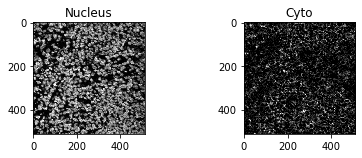

In [6]:
plt.subplot(2, 2, 1) 
io.imshow(train_X[0,:,:,0])
plt.title("Nucleus")

plt.subplot(2, 2, 2)
io.imshow(train_X[0,:,:,1])
plt.title("Cyto")
plt.show()

/app/software/scikit-image/0.19.1-foss-2021b/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


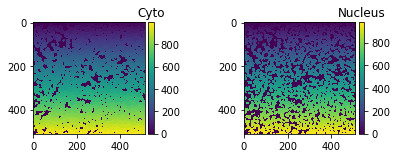

In [7]:
plt.subplot(2, 2, 1) # row 1, col 2 index 1
io.imshow(train_y[0,:,:,0])
plt.title("Cyto")
plt.subplot(2, 2, 2) # row 1, col 2 index 1
io.imshow(train_y[0,:,:,1])
plt.title("Nucleus")
plt.show()

In [22]:
train_y.dtype

dtype('int32')

In [31]:
io.imsave("/home/yfong/deeplearning/dense_cell_segmentation/train0_masks_0.png", np.array(train_y[0,:,:,0], dtype=np.uint8))

**Train image 2**

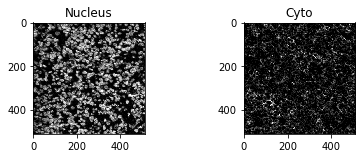

In [8]:
plt.subplot(2, 2, 3) # row 1, col 2 index 1
io.imshow(train_X[1,:,:,0])
plt.title("Nucleus")

plt.subplot(2, 2, 4) # row 1, col 2 index 1
io.imshow(train_X[1,:,:,1])
plt.title("Cyto")
plt.show()

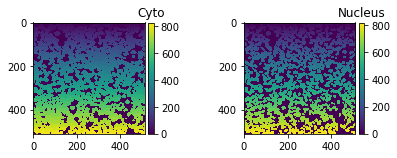

In [9]:
plt.subplot(2, 2, 3) # row 1, col 2 index 1
io.imshow(train_y[1,:,:,0])
plt.title("Cyto")
plt.subplot(2, 2, 4) # row 1, col 2 index 1
io.imshow(train_y[1,:,:,1])
plt.title("Nucleus")
plt.show()

**Test image 1**

In [ ]:
plt.subplot(2, 2, 1) # row 1, col 2 index 1
io.imshow(test_X[0,:,:,0])
plt.title("Nucleus")

plt.subplot(2, 2, 2) # row 1, col 2 index 1
io.imshow(test_X[0,:,:,1])
plt.title("Cyto")
plt.show()

**Write nuclear channel training images and masks**

(2601, 512, 512, 2)


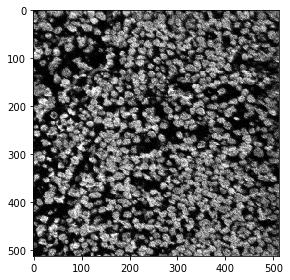

In [32]:
print(train_X.shape)
io.imshow(img_as_ubyte(train_X[0,:,:,0]))
plt.show()

**Write nuclear images and masks to files**<br>
Note that nuclear_train_all is created manually and contains all of train.

In [1]:
seed = 0 
import random

n=train_X.shape[0]
val_size = 0.2 # fraction of data saved as validation

tmp = random.sample(range(n), int(val_size*n))
X_val = train_X[tmp,:,:,:]
y_val = train_y[tmp,:,:,:]

tmp1 = list(set(range(n)).difference (set(tmp)))
X_train = train_X[tmp1,:,:,:]
y_train = train_y[tmp1,:,:,:]

NameError: name 'train_X' is not defined

In [16]:
from skimage import img_as_ubyte, img_as_uint

for img in range(X_train.shape[0]):
    tmpimg = X_train[img,:,:,0]
    tmpimg = np.expand_dims(tmpimg, -1)
    io.imsave('/fh/fast/fong_y/tissuenet_v1.0/images/train_nuclear/train'+str(img)+'_img.png', img_as_ubyte(tmpimg))
    
    tmpmask= y_train[img,:,:,1]
    io.imsave('/fh/fast/fong_y/tissuenet_v1.0/images/train_nuclear/train'+str(img)+'_masks.png', img_as_uint(tmpmask), check_contrast=False)

In [ ]:
# a strange thing is that if this cell is merged into the last cell, warnings about casting appear
for img in range(X_val.shape[0]):
    tmpimg = X_val[img,:,:,0]
    tmpimg = np.expand_dims(tmpimg, -1)
    io.imsave('/fh/fast/fong_y/tissuenet_v1.0/images/val_nuclear/val'+str(img)+'_img.png', img_as_ubyte(tmpimg))
    
    tmpmask= y_val[img,:,:,1]
    io.imsave('/fh/fast/fong_y/tissuenet_v1.0/images/val_nuclear/val'+str(img)+'_masks.png', img_as_uint(tmpmask), check_contrast=False)    